In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [13]:
df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/alifoldz.xlsx"))

In [14]:
# df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/alifoldz.xlsx"))

In [ ]:
filter = 1000

df_sissi_filterd = df_sissi[(df_sissi['Score'] >= -filter) & (df_sissi['Score'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['Score'] >= -filter) & (df_sissiz_mono['Score'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['Score'] >= -filter) & (df_sissiz_di['Score'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['Score'] >= -filter) & (df_multiperm_mono['Score'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['Score'] >= -filter) & (df_multiperm_di['Score'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['Score'] >= -filter) & (df_aln_shuffle['Score'] <= filter)]

In [15]:
df_sissi[['Score']].describe()

,Score
count,78.000000
mean,74307.353205
std,71056.092072
min,-86.900000
25%,-52.425000
50%,99931.700000
75%,99960.975000
max,200016.770000


In [16]:
df_sissiz_mono[['Score']].describe()

,Score
count,156.000000
mean,82695.820256
std,76336.026626
min,-26.700000
25%,14.397500
50%,100000.000000
75%,100011.175000
max,300016.310000


In [17]:
df_sissiz_di[['Score']].describe()

,Score
count,234.000000
mean,54700.523376
std,62830.542505
min,-46.940000
25%,1.025000
50%,41.990000
75%,100000.000000
max,399991.690000


In [18]:
df_multiperm_mono[['Score']].describe()

,Score
count,234.000000
mean,59834.196111
std,62229.915270
min,-35.240000
25%,8.955000
50%,99984.750000
75%,100006.300000
max,200017.300000


In [19]:
df_multiperm_di[['Score']].describe()

,Score
count,78.000000
mean,107699.215769
std,73449.755283
min,-43.900000
25%,99997.847500
50%,100000.000000
75%,100023.120000
max,399977.750000


In [20]:
df_aln_shuffle[['Score']].describe()

,Score
count,156.000000
mean,67958.500321
std,66220.923829
min,-46.200000
25%,17.975000
50%,99992.815000
75%,100022.227500
max,300014.690000


C:\Users\Stefan\AppData\Local\Temp\ipykernel_12252\3731365851.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12252\3731365851.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12252\3731365851.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_12252\3731365851.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurpl

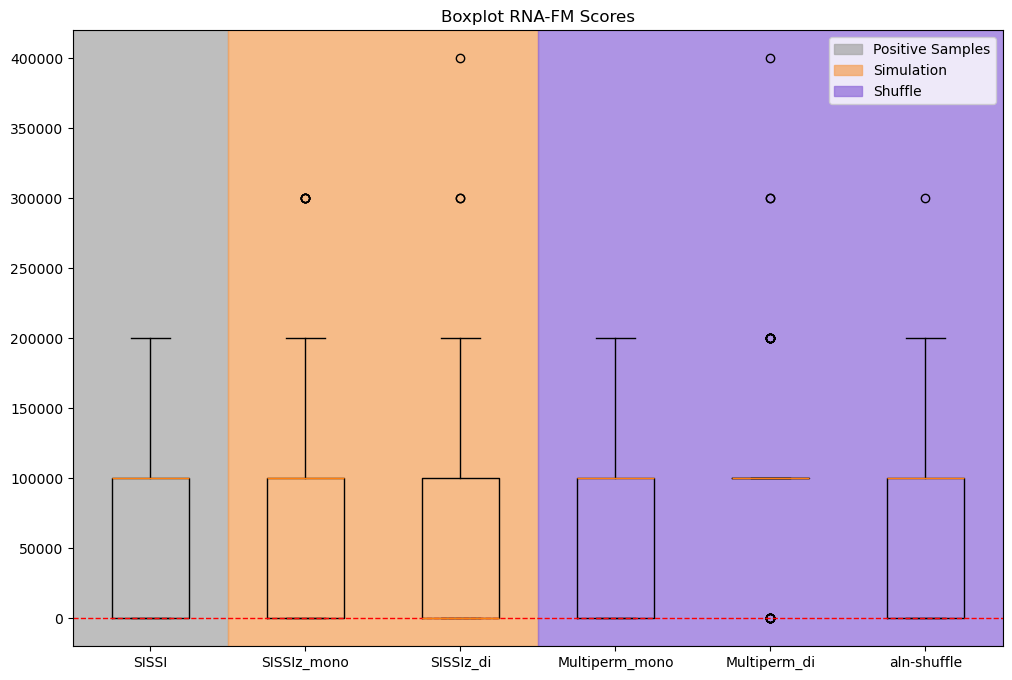

In [ ]:
def createResultsFromExcel(dataframes):
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df['Score'] for df in dataframes]
    thresholds = [0]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    for t in thresholds:
        plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    plt.title('Boxplot RNA-FM with RNAeval Score')
    plt.legend()
    plt.show()